# Exploratory Data Analysis (EDA)

Conduct EDA on real estate data to analyze relationships between variables

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\bronc\Downloads\Capstone 2\Real_Estate_Sales_2001-2018(clean).csv')

In [3]:
df.head()

,Unnamed: 0,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,0,110540,2011,2012-04-03,Stamford,56 CHERRY HILL ROAD,795870,690000,0.866976,Residential,Single Family
1,1,120025,2012,2012-10-05,Greenwich,"78 BALDWIN FARMS SOUTH, GREENW",1925560,3224000,1.674318,Residential,Single Family
2,3,60173,2006,2006-12-28,Windsor,7 ALFORD DR,189630,309000,1.629489,Residential,Single Family
3,5,14539,2014,2015-05-28,Milford,170 MEADOWSIDE RD,147340,150000,1.018053,Residential,Single Family
4,9,160629,2016,2017-01-31,Bridgeport,75 EDGEMOOR RD,163380,180000,1.101726,Residential,Single Family


In [4]:
#Let's review the data to see if there's anything else to clean up before EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580245 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       580245 non-null  int64  
 1   SerialNumber     580245 non-null  int64  
 2   ListYear         580245 non-null  int64  
 3   DateRecorded     580245 non-null  object 
 4   Town             580245 non-null  object 
 5   Address          580245 non-null  object 
 6   AssessedValue    580245 non-null  int64  
 7   SaleAmount       580245 non-null  int64  
 8   SalesRatio       580245 non-null  float64
 9   PropertyType     580245 non-null  object 
 10  ResidentialType  580245 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 48.7+ MB


In [5]:
df.PropertyType.value_counts()

Residential    580130
Vacant Land        64
Commercial         36
Industrial          8
Apartments          7
Name: PropertyType, dtype: int64

In [6]:
df.ResidentialType.value_counts()

Single Family    529249
Two Family        33170
Three Family      16849
Four Family         908
Multi Family         69
Name: ResidentialType, dtype: int64

In [7]:
# After inspecting these variables I decided to remove the non-residential property types as I want to focus on the others for analysis

df = df[df['PropertyType'] == 'Residential']

In [8]:
# Verify that all variables now have 580,130 rows

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580130 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       580130 non-null  int64  
 1   SerialNumber     580130 non-null  int64  
 2   ListYear         580130 non-null  int64  
 3   DateRecorded     580130 non-null  object 
 4   Town             580130 non-null  object 
 5   Address          580130 non-null  object 
 6   AssessedValue    580130 non-null  int64  
 7   SaleAmount       580130 non-null  int64  
 8   SalesRatio       580130 non-null  float64
 9   PropertyType     580130 non-null  object 
 10  ResidentialType  580130 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 53.1+ MB


In [9]:
df.describe()

,Unnamed: 0,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,580130.000000,5.801300e+05,580130.000000,5.801300e+05,5.801300e+05,5.801300e+05
mean,486418.292574,1.162658e+05,2007.900236,2.190469e+05,3.521517e+05,inf
std,262262.985355,5.502732e+05,5.043963,4.210077e+05,1.362463e+06,NaN
min,0.000000,8.200000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,301507.500000,2.088000e+04,2003.000000,9.436000e+04,1.500000e+05,1.266148e+00
50%,504531.500000,5.146250e+04,2007.000000,1.421300e+05,2.320000e+05,1.597131e+00
75%,708487.750000,1.204190e+05,2013.000000,2.240900e+05,3.660000e+05,2.050398e+00
max,912300.000000,1.600397e+07,2016.000000,1.106702e+08,9.409400e+08,inf


In [10]:
df.AssessedValue.value_counts()

0          2919
84000       259
105000      252
91000       229
112000      228
           ... 
363770        1
11050         1
31520         1
683270        1
1530280       1
Name: AssessedValue, Length: 68109, dtype: int64

In [11]:
df.SaleAmount.value_counts()

150000    5576
250000    5035
175000    4709
225000    4652
180000    4611
          ... 
282178       1
484903       1
398857       1
579025       1
59363        1
Name: SaleAmount, Length: 33907, dtype: int64

In [12]:
df = df[df['AssessedValue'] > 0]

In [13]:
df = df[df['SaleAmount'] > 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576065 entries, 0 to 580244
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       576065 non-null  int64  
 1   SerialNumber     576065 non-null  int64  
 2   ListYear         576065 non-null  int64  
 3   DateRecorded     576065 non-null  object 
 4   Town             576065 non-null  object 
 5   Address          576065 non-null  object 
 6   AssessedValue    576065 non-null  int64  
 7   SaleAmount       576065 non-null  int64  
 8   SalesRatio       576065 non-null  float64
 9   PropertyType     576065 non-null  object 
 10  ResidentialType  576065 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 52.7+ MB


In [15]:
df.describe()

,Unnamed: 0,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,576065.000000,5.760650e+05,576065.000000,5.760650e+05,5.760650e+05,5.760650e+05
mean,487170.225247,1.167606e+05,2007.924054,2.201764e+05,3.515153e+05,2.747234e+00
std,262774.811040,5.521470e+05,5.044502,4.211178e+05,5.676811e+05,2.321313e+02
min,0.000000,8.200000e+01,2001.000000,1.000000e+00,1.000000e+00,8.153814e-07
25%,301553.000000,2.089700e+04,2003.000000,9.510000e+04,1.506750e+05,1.266464e+00
50%,506930.000000,5.181700e+04,2007.000000,1.428000e+05,2.330000e+05,1.594842e+00
75%,709681.000000,1.204830e+05,2013.000000,2.249100e+05,3.675000e+05,2.042778e+00
max,912300.000000,1.600397e+07,2016.000000,1.106702e+08,6.150300e+07,1.416667e+05


# Data Distributions and Correlations

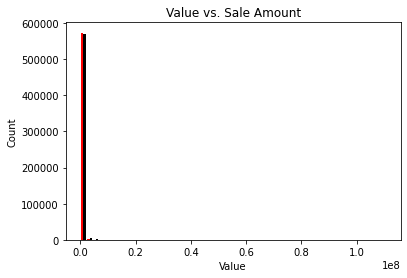

In [16]:
#Let's look at some histograms of the key variables of interest
Value = df['AssessedValue']
Sale = df['SaleAmount']
plt.hist([Value, Sale], color = ['red', 'black'], bins = 50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value vs. Sale Amount')
plt.show()

Looks like there are outliers that make the histogram not show us anything that we can readily analyze. Looking back at the df.describe() results we can see that in general SaleAmount is higher than AssessedValue given that it has higher values at all percentiles and mean even though the maximum AssessedValue is higher

<AxesSubplot:>

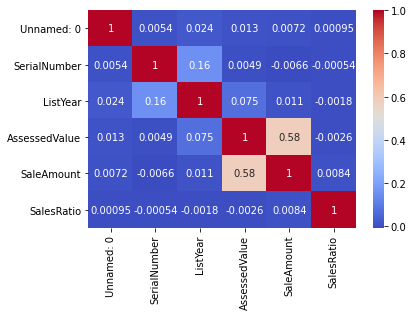

In [17]:
# Next let's look at a heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

There look like there's only 1 combination that has strong correlation. AssessedValue and SaleAmount with a Pearson Correlation Coefficient of 0.58. Attempting to run a pairplot didn't seem to work. My best guess is that the data file is too large. Next let's inspect the correlation between these two variables

# Visualizing Correlations

<AxesSubplot:xlabel='AssessedValue', ylabel='SaleAmount'>

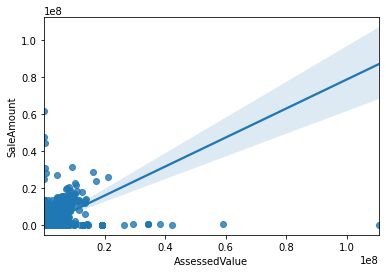

In [20]:
#Let's view the relationship between AssessedValue and SaleAmount
sns.regplot(x='AssessedValue', y='SaleAmount', data=df, scatter = True)

# Correlation Assessment

The only variables with even a somewhat strong relationship appears to be AssessedValue and SaleAmount. These two seem to have a stronger relationship when the two are both lower while outliers seem to really be off. The line of best fit really only goes through the data at the beginning of the line